In [1]:
%matplotlib inline
from sklearn import datasets
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import time

# Hide convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
# load data
raw_data = load_wine()
X, y = raw_data.data, raw_data.target

In [3]:
raw_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
# split data
data_train, data_test, label_train, label_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(len(data_train),' samples in training data\n',
      len(data_test),' samples in test data\n', )

142  samples in training data
 36  samples in test data



In [5]:
# normalize the input features
scaler = StandardScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

### Models prediction with default parameters

In [6]:
# plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=(0.6,1), cv=5, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.grid()
    plt.legend(loc="best")
    return plt

Test data accuracy of Decision tree is 0.8611111111111112


<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

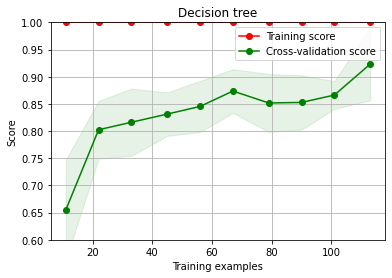

In [7]:
# Decision tree
# initialize the model with standard parameters
clf_dt = DecisionTreeClassifier(random_state=1)
# train the model
clf_dt.fit(data_train, label_train)
# Evaluating accuracy on the test data
accuracy_dt = clf_dt.score(data_test, label_test)

print("Test data accuracy of Decision tree is " + repr(accuracy_dt))
plot_learning_curve(clf_dt, 'Decision tree', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

Test data accuracy of K Nearest Neighbors is 0.9722222222222222


<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

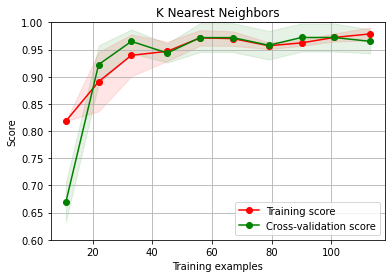

In [8]:
# KNN
clf_knn = KNeighborsClassifier()
clf_knn.fit(data_train, label_train)
accuracy_knn = clf_knn.score(data_test, label_test)

print("Test data accuracy of K Nearest Neighbors is " + repr(accuracy_knn))
plot_learning_curve(clf_knn, 'K Nearest Neighbors', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

Test data accuracy of svm is 0.9722222222222222


<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

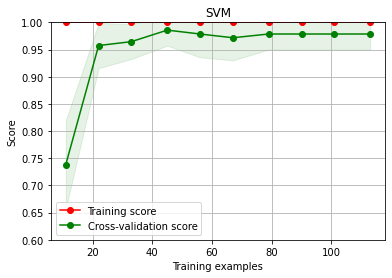

In [9]:
# svm
clf_svm = SVC(random_state=1)
clf_svm.fit(data_train, label_train)
accuracy_svm = clf_svm.score(data_test, label_test)

print("Test data accuracy of svm is " + repr(accuracy_svm))
plot_learning_curve(clf_svm, 'SVM', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

Test data accuracy of Neural network is 0.9722222222222222


<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

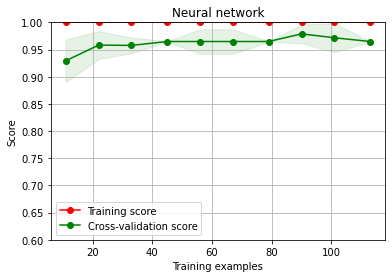

In [10]:
# Neural network
clf_nn = MLPClassifier(random_state=1)
clf_nn.fit(data_train, label_train)
accuracy_nn = clf_nn.score(data_test, label_test)

print("Test data accuracy of Neural network is " + repr(accuracy_nn))
plot_learning_curve(clf_nn, 'Neural network', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

Test data accuracy of AdaBoosting is 0.8611111111111112


<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

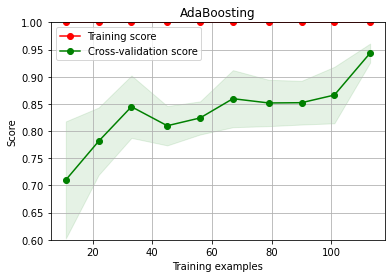

In [11]:
# Boosting
clf_boost = AdaBoostClassifier(base_estimator=clf_dt, random_state=1)
clf_boost.fit(data_train, label_train)
accuracy_boost = clf_boost.score(data_test, label_test)

print("Test data accuracy of AdaBoosting is " + repr(accuracy_boost))
plot_learning_curve(clf_boost, 'AdaBoosting', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

### Models hyperparameter tuning

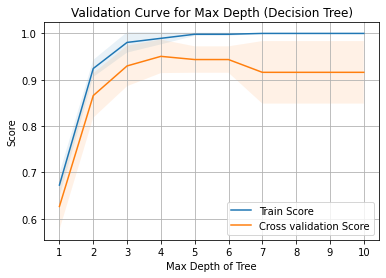

In [12]:
# Decision tree: Max depth of tree
param_range = np.arange(1,11)
train_scores, test_scores = validation_curve(clf_dt, data_train, label_train, param_range=param_range, param_name='max_depth', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for Max Depth (Decision Tree)")
plt.xlabel("Max Depth of Tree")
plt.ylabel("Score")
plt.xticks(np.arange(1,11))
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

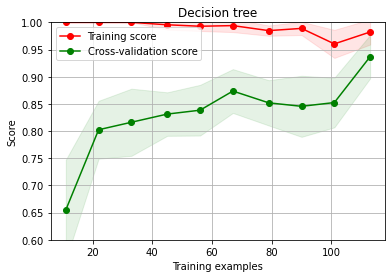

In [13]:
dt_depth =  DecisionTreeClassifier(max_depth=3, random_state=1)
plot_learning_curve(dt_depth, 'Decision tree', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

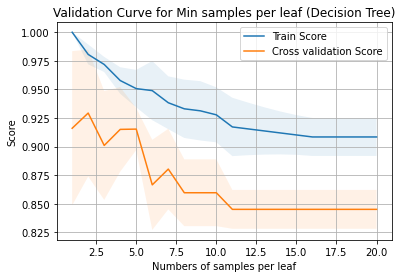

In [14]:
# Decision tree: Min samples on leaf
param_range = np.arange(1,21)
train_scores, test_scores = validation_curve(clf_dt, data_train, label_train, param_range=param_range, param_name='min_samples_leaf', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for Min samples per leaf (Decision Tree)")
plt.xlabel("Numbers of samples per leaf")
plt.ylabel("Score")
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

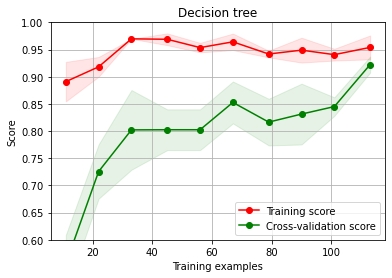

In [15]:
dt_leaf =  DecisionTreeClassifier(min_samples_leaf=5, random_state=1)
plot_learning_curve(dt_leaf, 'Decision tree', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

In [12]:
dt_optimal =  DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=1)
# plot_learning_curve(dt_optimal, 'Decision tree', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

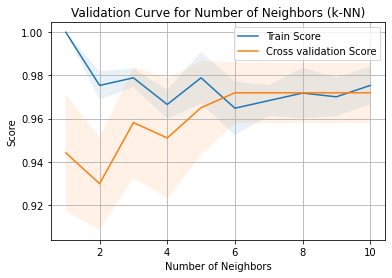

In [17]:
# KNN: number of neighbors
param_range = np.arange(1,11)
train_scores, test_scores = validation_curve(clf_knn, data_train, label_train, param_range=param_range, param_name='n_neighbors', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for Number of Neighbors (k-NN)")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.grid()
plt.show()


<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

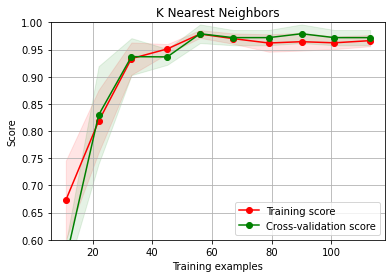

In [18]:
knn_k = KNeighborsClassifier(n_neighbors=6)
plot_learning_curve(knn_k, 'K Nearest Neighbors', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

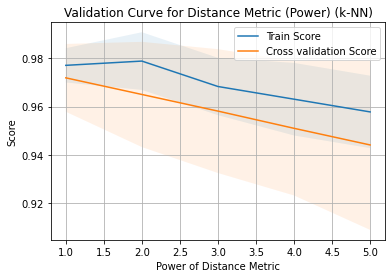

In [19]:
# KNN: Power of Distance Metric
param_range = np.arange(1,6)
train_scores, test_scores = validation_curve(clf_knn, data_train, label_train, param_range=param_range, param_name='p', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for Distance Metric (Power) (k-NN)")
plt.xlabel("Power of Distance Metric")
plt.ylabel("Score")
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

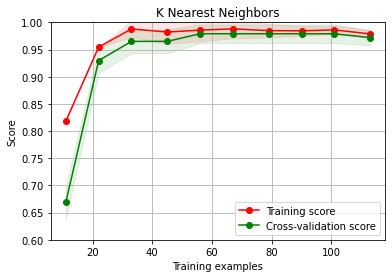

In [20]:
knn_p = KNeighborsClassifier(p=1)
plot_learning_curve(knn_p, 'K Nearest Neighbors', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

In [13]:
knn_optimal = KNeighborsClassifier(n_neighbors=6, p=1)
# plot_learning_curve(knn_optimal, 'K Nearest Neighbors', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

Test score of linear kernel: 0.96
Test score of poly kernel: 0.90
Test score of rbf kernel: 0.98
Test score of sigmoid kernel: 0.99


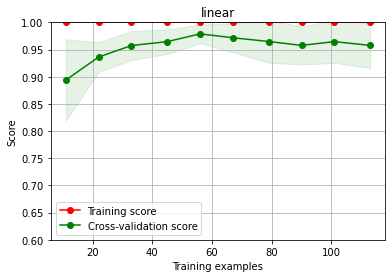

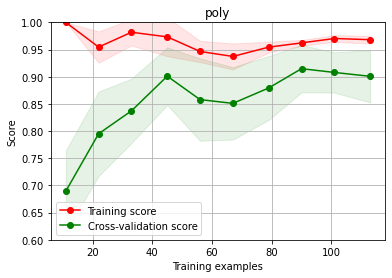

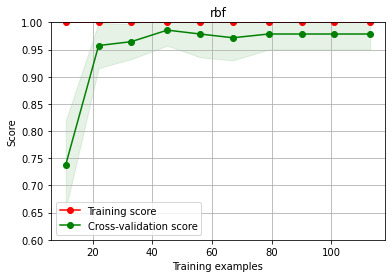

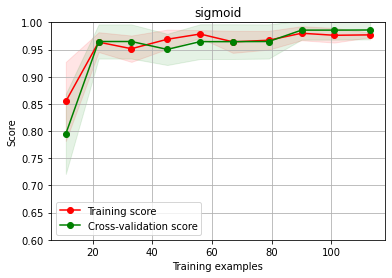

In [43]:
# svm: kernel functions
kernel_func = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernel_func:
    clf = SVC(kernel=i, random_state=1)
    plot_learning_curve(clf, i, data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))
    scores = cross_val_score(clf, data_train, label_train)
    print("Test score of " + i + " kernel: {:.2f}".format(scores.mean(), np.var(scores)))

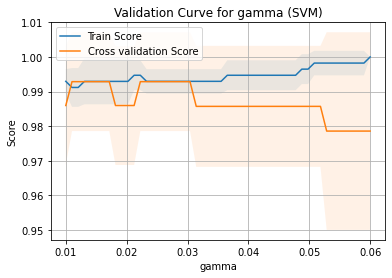

In [22]:
#svm: gamma
param_range = np.linspace(0.01, 0.06)
train_scores, test_scores = validation_curve(clf_svm, data_train, label_train, param_range=param_range, param_name='gamma', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for gamma (SVM)")
plt.xlabel("gamma")
plt.ylabel("Score")
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

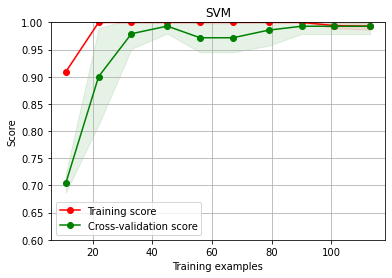

In [23]:
svm_gamma = SVC(gamma=0.015, random_state=1)
plot_learning_curve(svm_gamma, 'SVM', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

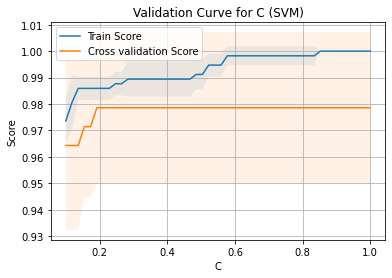

In [24]:
#svm: C
param_range = np.linspace(0.1, 1)
train_scores, test_scores = validation_curve(clf_svm, data_train, label_train, param_range=param_range, param_name='C', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for C (SVM)")
plt.xlabel("C")
plt.ylabel("Score")
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

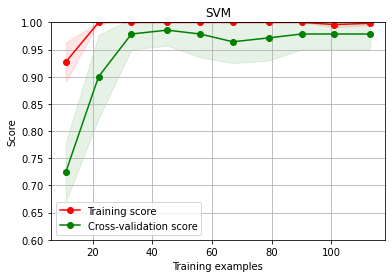

In [25]:
svm_C = SVC(C=0.6, random_state=1)
plot_learning_curve(svm_C, 'SVM', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

In [14]:
svm_optimal = SVC(kernel='rbf', gamma=0.015, C=1, random_state=1)
# plot_learning_curve(svm_optimal, 'SVM', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

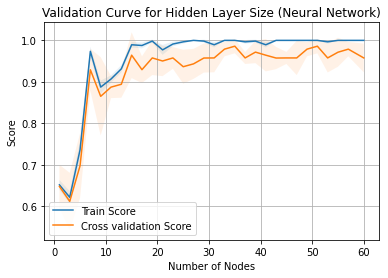

In [63]:
# Neural network: hidden layers
param_range = np.linspace(1,60,30).astype('int')
train_scores, test_scores = validation_curve(clf_nn, data_train, label_train, param_range=param_range, param_name='hidden_layer_sizes', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for Hidden Layer Size (Neural Network)")
plt.xlabel("Number of Nodes")
plt.ylabel("Score")
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\ywang64\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

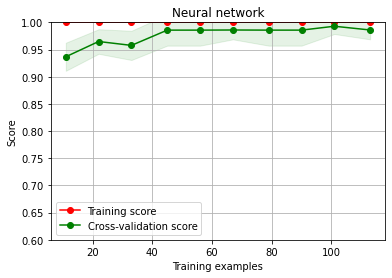

In [67]:
nn_layer = MLPClassifier(hidden_layer_sizes=(35),random_state=1)
plot_learning_curve(nn_layer, 'Neural network', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

Test score of Neural network identity activation: 0.98
Test score of Neural network logistic activation: 0.97
Test score of Neural network tanh activation: 0.97
Test score of Neural network relu activation: 0.96


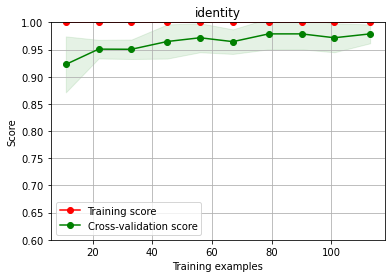

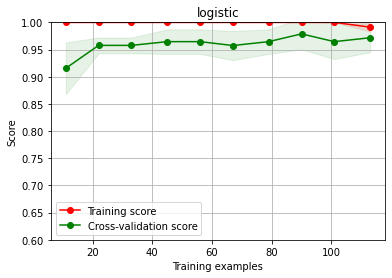

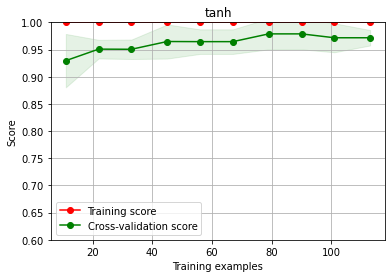

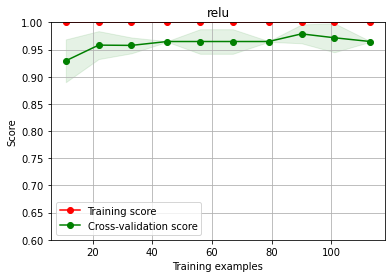

In [68]:
# Neural network: Activation functions
activition_func = ['identity', 'logistic', 'tanh', 'relu']
for i in activition_func:
    clf = MLPClassifier(activation=i, random_state=1)
    plot_learning_curve(clf, i, data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))
    scores = cross_val_score(clf, data_train, label_train)
    print("Test score of Neural network " + i + " activation: {:.2f}".format(scores.mean(), np.var(scores)))

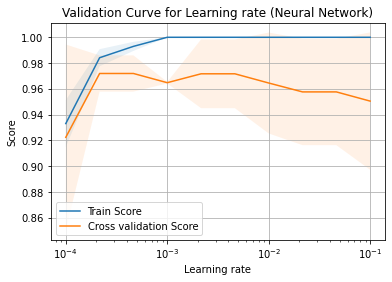

In [88]:
# Neural network: Learning rate
param_range = np.logspace(-4, -1, 10)
train_scores, test_scores = validation_curve(clf_nn, data_train, label_train, param_range=param_range, param_name='learning_rate_init', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.semilogx(param_range, train_scores_mean, label='Train Score')
plt.semilogx(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for Learning rate (Neural Network)")
plt.xlabel("Learning rate")
plt.ylabel("Score")
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

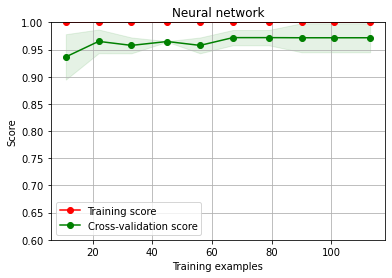

In [91]:
nn_lr = MLPClassifier(learning_rate_init=0.002,random_state=1)
plot_learning_curve(nn_lr, 'Neural network', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

In [15]:
nn_optimal = MLPClassifier(hidden_layer_sizes=(35),  learning_rate_init=0.002, random_state=1)
# plot_learning_curve(nn_optimal, 'Neural network', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

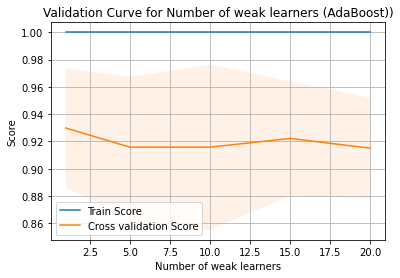

In [77]:
# AdaBoost: Number of weak learners
param_range = np.linspace(1,20, 5).astype('int')
train_scores, test_scores = validation_curve(clf_boost, data_train, label_train, param_range=param_range, param_name='n_estimators', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for Number of weak learners (AdaBoost))")
plt.xlabel("Number of weak learners")
plt.ylabel("Score")
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

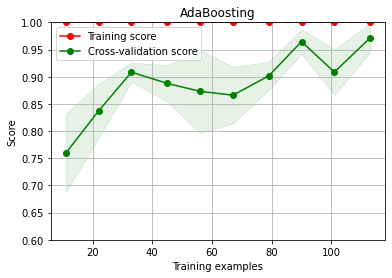

In [66]:
boost_learners = AdaBoostClassifier(base_estimator=dt_optimal, n_estimators=5)
plot_learning_curve(boost_learners, 'AdaBoosting', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

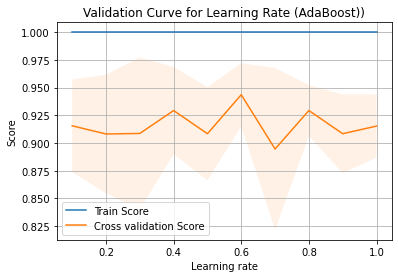

In [79]:
# AdaBoost: Learning rate
param_range = np.linspace(0.1, 1, 10)
train_scores, test_scores = validation_curve(clf_boost, data_train, label_train, param_range=param_range, param_name='learning_rate', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.figure()
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1)
plt.plot(param_range, train_scores_mean, label='Train Score')
plt.plot(param_range, test_scores_mean, label='Cross validation Score')
plt.legend()
plt.title("Validation Curve for Learning Rate (AdaBoost))")
plt.xlabel("Learning rate")
plt.ylabel("Score")
plt.grid()
plt.show()

<module 'matplotlib.pyplot' from '/Applications/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

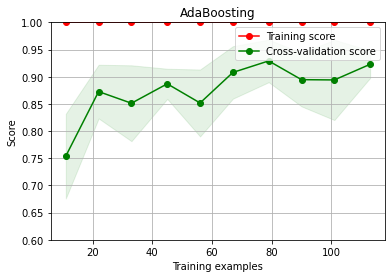

In [67]:
boost_lr = AdaBoostClassifier(base_estimator=dt_optimal, learning_rate=0.1)
plot_learning_curve(boost_lr, 'AdaBoosting', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

In [16]:
boost_optimal = AdaBoostClassifier(base_estimator=dt_optimal,n_estimators=15, learning_rate=0.1)
# plot_learning_curve(boost_optimal, 'AdaBoosting', data_train, label_train, n_jobs=1, train_sizes=np.linspace(0.1,1.0, 10))

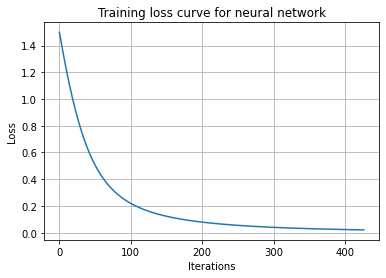

In [29]:
# plot loss curve for neural network
mlp = MLPClassifier(hidden_layer_sizes=(35),
                  activation='relu',
                  learning_rate_init =0.001,
                  max_iter=10000,
                  random_state=1)
mlp.fit(data_train, label_train)
plt.figure()
plt.plot(mlp.loss_curve_)
plt.title('Training loss curve for neural network')
plt.xlabel('Iterations')
plt.ylabel("Loss")
plt.grid()
plt.show()

In [17]:
classifiers_optimal = {
    "Decision Tree": {
        'classifier': dt_optimal,
    },
    "Nearest Neighbors": {
        'classifier': knn_optimal,
    },
    "SVM": {
        'classifier': svm_optimal,
    },
    "Neural network": {
        'classifier': nn_optimal,
    },
    "AdaBoost": {
        'classifier': boost_optimal,
    }
}

trained Decision Tree in 0.001241 s with train score 0.9437 and test score 0.92


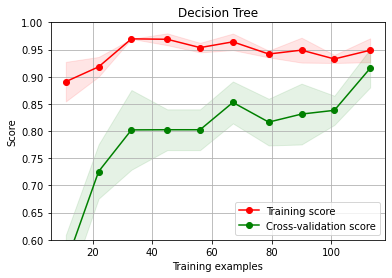

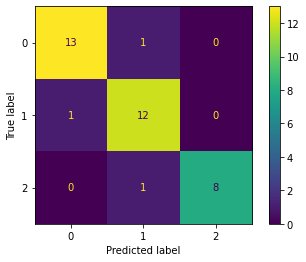

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.86      0.92      0.89        13
           2       1.00      0.89      0.94         9

    accuracy                           0.92        36
   macro avg       0.93      0.91      0.92        36
weighted avg       0.92      0.92      0.92        36

trained Nearest Neighbors in 0.001808 s with train score 0.9718 and test score 0.97


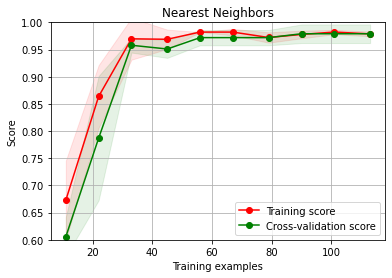

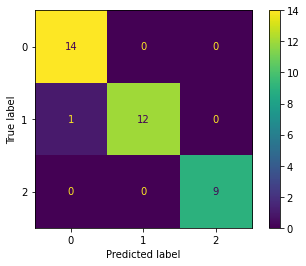

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

trained SVM in 0.004305 s with train score 0.9930 and test score 1.00


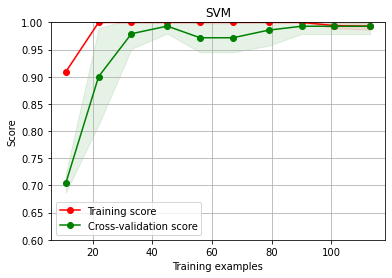

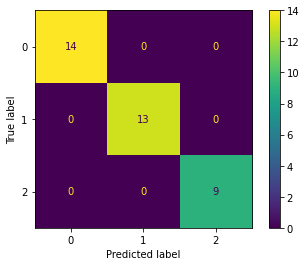

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

trained Neural network in 0.247656 s with train score 1.0000 and test score 1.00


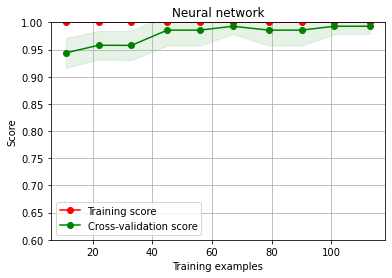

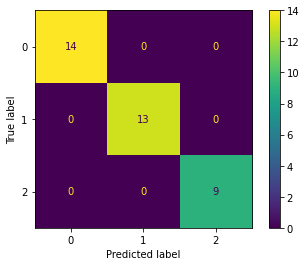

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

trained AdaBoost in 0.039227 s with train score 1.0000 and test score 0.97


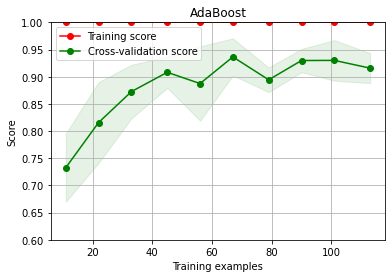

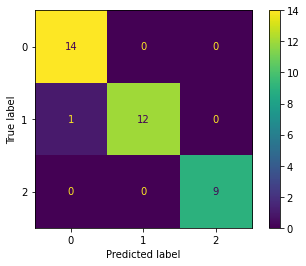

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



In [18]:
# train the models and predict on the test data
def classify(classifiers, X_train, Y_train, X_test, Y_test):
    test_scores = []
    train_time = []
    test_time = []
    for  key, classifier in classifiers_optimal.items():
        train_start = time.time()
        estimator = classifier['classifier'].fit(X_train, Y_train)
        train_end = time.time()
        train_diff = train_end - train_start
        train_time.append(train_diff)

        train_score = estimator.score(X_train, Y_train)
        test_score = estimator.score(X_test, Y_test)
        test_scores.append(test_score)
        print("trained {c} in {f:.6f} s ".format(c=key, f=train_diff) + "with train score " + "{tr:.4f}".format(tr=train_score) + " and test score " + "{te:.2f}".format(te=test_score))
        plot_learning_curve(estimator, "{}".format(key), X_train, Y_train)

        test_start = time.time()
        predictions = estimator.predict(X_test)
        test_end = time.time()
        test_diff = test_end - test_start
        test_time.append(test_diff)
        
        # plot confusion matrix
        cm = confusion_matrix(Y_test, predictions, labels=estimator.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=estimator.classes_)
        disp.plot()
        plt.show()
        print(classification_report(Y_test, predictions))
    return test_scores, train_time, test_time

test_scores, train_time, test_time = classify(classifiers_optimal, data_train, label_train, data_test, label_test)

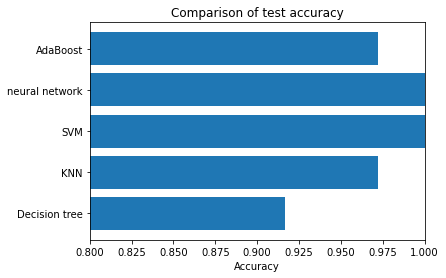

In [19]:
# plot models test scores
classifiers = ('Decision tree', 'KNN', 'SVM', 'neural network', 'AdaBoost')
scores = np.array(test_scores)
y_pos = np.arange(len(classifiers))
plt.figure()
plt.barh(y_pos, scores)
plt.gca().set_yticks(y_pos)
plt.gca().set_xlim(0.8, 1.0)
plt.gca().set_yticklabels(classifiers)
plt.title('Comparison of test accuracy')
plt.xlabel('Accuracy')
plt.show()

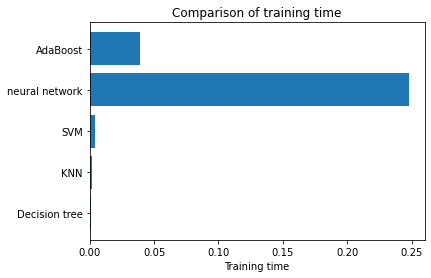

In [20]:
# plot models training time
classifiers = ('Decision tree', 'KNN', 'SVM', 'neural network', 'AdaBoost')
train_time_np = np.array(train_time)
y_pos = np.arange(len(classifiers))
plt.figure()
plt.barh(y_pos, train_time_np)
plt.gca().set_yticks(y_pos)
plt.gca().set_yticklabels(classifiers)
plt.title('Comparison of training time')
plt.xlabel('Training time')
plt.show()

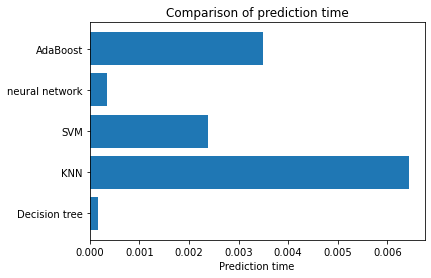

In [21]:
# plot models prediction time
classifiers = ('Decision tree', 'KNN', 'SVM', 'neural network', 'AdaBoost')
test_time_np = np.array(test_time)
y_pos = np.arange(len(classifiers))
plt.figure()
plt.barh(y_pos, test_time_np)
plt.gca().set_yticks(y_pos)
plt.gca().set_yticklabels(classifiers)
plt.title('Comparison of prediction time')
plt.xlabel('Prediction time')
plt.show()

### Models more hyperparameters tuning

In [58]:
# model and classifiers with parameters to be tuned
classifiers_tuned = {
        "Decision Tree":
                {'classifier': DecisionTreeClassifier(),
                'params': [
                        {
                        'criterion' : ['gini', 'entropy'],
                        'max_depth': [4],
                        'min_samples_split': [2],
                        'min_samples_leaf': np.arange(1,21),
                        'random_state': [1]
                        }
                        ]
                },

        "Nearest Neighbors": 
                {'classifier': KNeighborsClassifier(),
                'params': [
                        {
                        'n_neighbors': [6],
                        'p': [1],
                        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#                         'weights': ['uniform', 'distance'],
                        'n_jobs': [-1]
                        }
                        ]
                },
             
        "SVM": 
                {'classifier': SVC(),
                'params': [
                        {
                        'C': [0.2, 1],
                        'gamma': [0.015],
                        'kernel': ['rbf'],
                        'random_state': [1]
                        }
                        ]
                },
        "Neural network":
                {'classifier': MLPClassifier(),
                'params': [
                        {
                        'hidden_layer_sizes': [(35),],
                        'activation': ['relu'],
                        'learning_rate_init': np.arange(0.0001, 0.001),
                        'max_iter': [10000],
                        'warm_start': [True],
#                         'early_stopping': [True],
                        'random_state': [1]
                        }
                        ]
                },
         "AdaBoost":
                {'classifier': AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
                'params': [
                        {
                        'learning_rate': np.arange(0.1, 1),
                        'n_estimators' : [1, 5, 15],
                        'base_estimator__max_depth': [3],
                        'base_estimator__min_samples_leaf':[5],
                        'random_state': [1]
                        }
                        ]
                }



}

In [59]:
# train the models and predict on the test data
def batch_classify(classifiers, X_train, Y_train, X_test, Y_test, verbose = True):
    df_results = pd.DataFrame(
        data=np.zeros(shape=(len(classifiers.keys()),4)),
        columns = ['classifier',
                   'train_score', 
                   'test_score',
                   'training_time'])
    cv = 5
    count = 0
    for key, classifier in classifiers.items():
        train_start = time.time()
        grid = GridSearchCV(classifier['classifier'], 
                            classifier['params'],
                            refit=True,
                            cv = cv, 
                            scoring = 'accuracy', # scoring metric
                            n_jobs = -1
                           )
        estimator = grid.fit(X_train, Y_train)
        train_end = time.time()
        train_diff = train_end - train_start
        
        train_score = estimator.score(X_train, Y_train)
        test_score = estimator.score(X_test, Y_test)
        
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = train_diff
        
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=train_diff))
            print(grid.best_params_)
        count+=1
        plot_learning_curve(estimator, 
                              "{}".format(key),
                              X_train,
                              Y_train,
                              ylim=(0.7,1.0),
                              cv=cv)
        # plot confusion matrix
        predictions = grid.predict(X_test)
        cm = confusion_matrix(Y_test, predictions, labels=grid.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
        disp.plot()
        plt.show()
        print(classification_report(Y_test, predictions))
    return df_results

trained Decision Tree in 4.63 s
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 1}


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  

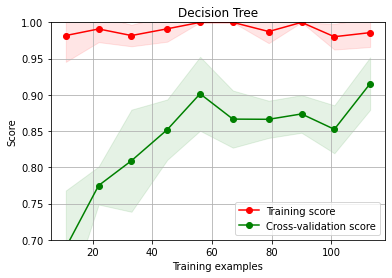

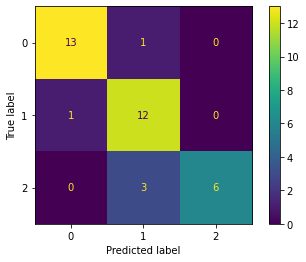

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.75      0.92      0.83        13
           2       1.00      0.67      0.80         9

    accuracy                           0.86        36
   macro avg       0.89      0.84      0.85        36
weighted avg       0.88      0.86      0.86        36

trained Nearest Neighbors in 0.10 s
{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 6, 'p': 1}


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  

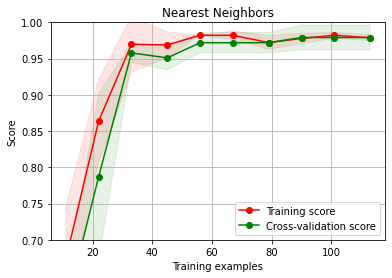

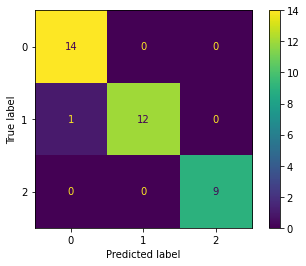

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

trained SVM in 0.06 s
{'C': 1, 'gamma': 0.015, 'kernel': 'rbf', 'random_state': 1}


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  

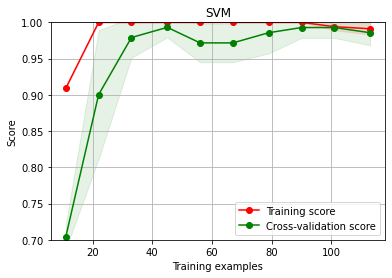

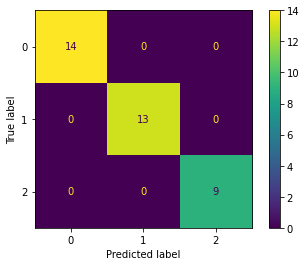

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

trained Neural network in 7.21 s
{'activation': 'relu', 'hidden_layer_sizes': 35, 'learning_rate_init': 0.0001, 'max_iter': 10000, 'random_state': 1, 'warm_start': True}


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  

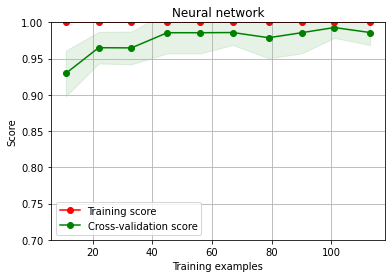

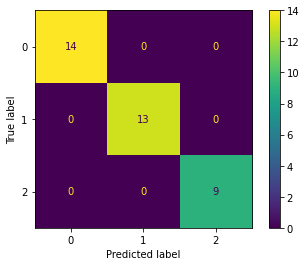

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

trained AdaBoost in 0.24 s
{'base_estimator__max_depth': 4, 'base_estimator__min_samples_leaf': 5, 'learning_rate': 0.1, 'n_estimators': 15, 'random_state': 1}


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Applications/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  

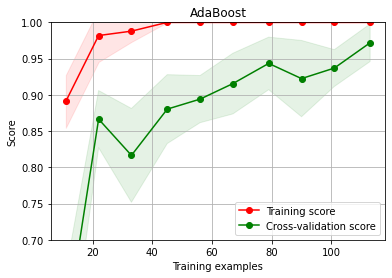

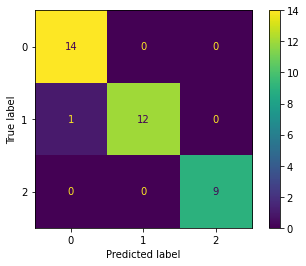

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36



,classifier,train_score,test_score,training_time
2,SVM,0.992958,1.000000,0.061413
3,Neural network,1.000000,1.000000,7.212947
1,Nearest Neighbors,0.971831,0.972222,0.097897
4,AdaBoost,1.000000,0.972222,0.240222
0,Decision Tree,0.992958,0.861111,4.627721


In [60]:
tuned_results = batch_classify(classifiers_tuned, data_train, label_train, data_test, label_test)
display(tuned_results.sort_values(by='test_score', ascending=False))